In [1]:
import sys
sys.version

'2.7.12 |Continuum Analytics, Inc.| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]'

# Subway data


## Possible questions
- What variables are related to subway ridership?
  - which stations have most riders? 
  - what are the ridership patterns over time? 
      - will I able to see rush hours? 
      - how about holidays and Sundays? 
- what patterns can I find in the wether?
    - is the temperature rising throughout the month? 
        - global warming? 
    - how does weather vary accross the city?

## two-dimentional data
- Python: list of lists
- NumPy: 2D array  <-- **let's start here!**
- Pandas: DataFrame

2D arrays, as opposed to array of ararys:
- more memory efficient
- accesing elements is a bit different
    - a[1,3] rather than a[1][3]
- mean(), std(), etc. operate on entire array

### Quiz:
1. Find the max riders on the first day
2. Find the mean riders per day

In [2]:
import numpy as np

In [3]:

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Change False to True for each block of code to see what it does

# Accessing elements
if False:
    print 'Accessing elements:'
    print ridership[1, 3]
    print ridership[1:3, 3:5]
    print ridership[1, :]
    
# Vectorized operations on rows or columns
if False:
    print '\nVectorized operations on rows or columns:'
    print ridership[0, :] + ridership[1, :]
    print ridership[:, 0] + ridership[:, 1]
    
# Vectorized operations on entire arrays
if False:
    print '\nVectorized operations on entire arrays:'
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print a + b

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    overall_mean = np.mean(ridership)
    maxRidersIndexForFirstDay = np.argmax(ridership[0])
    mean_for_max = np.mean(ridership[:,maxRidersIndexForFirstDay])
    
    return (overall_mean, mean_for_max)

print np.shape(ridership)
mean_riders_for_max_station(ridership)

(10L, 5L)


(2342.5999999999999, 3239.9000000000001)

## Operations along an Axis
![numpy_axis](numpy_axis.png)

#### Exercise:
Find the mean ridership per day for each subway station. Return the maximum and minumum ridership per day.

In [4]:
import numpy as np

# Change False to True for this block of code to see what it does

# NumPy axis argument
if False:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print a.sum()
    print a.sum(axis=0)
    print a.sum(axis=1)
    
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    meanRidershipPerDay = ridership.mean(axis=0)
    maxRidershipStationPerDay = meanRidershipPerDay.max()
    minRidershipStationPerDay = meanRidershipPerDay.min()
    
    max_daily_ridership = maxRidershipStationPerDay     # Replace this with your code
    min_daily_ridership = minRidershipStationPerDay     # Replace this with your code
    
    return (max_daily_ridership, min_daily_ridership)

In [5]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

## Pandas DataFrame
Numpy array demends that all elements in an array should be the same type. Which means you cannot mix strings and numerical values in a same array. Pandas' DataFrame fixes this problem by allowing mixture of types per column in one DataFrame. 

- How to access elementes of a DataFrame?

In [6]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

# Change False to True for each block of code to see what it does

# DataFrame creation
if False:
    # You can create a DataFrame out of a dictionary mapping column names to values
    df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df_1

    # You can also use a list of lists or a 2D NumPy array
    df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
    print df_2
   

# Accessing elements
if False:
    print ridership_df.iloc[0]
    print ridership_df.loc['05-05-11']
    print ridership_df['R003']
    print ridership_df.iloc[1, 3]
    
# Accessing multiple rows
if False:
    print ridership_df.iloc[1:4]
    
# Accessing multiple columns
if False:
    print ridership_df[['R003', 'R005']]
    
# Pandas axis
if False:
    df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df.sum()
    print df.sum(axis=1)
    print df.values.sum()
    
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    overall_mean = ridership.mean().mean()
    maxStationOnFirstDay = ridership.iloc[0].argmax()
    mean_for_max = ridership[maxStationOnFirstDay].mean()
    
    return (overall_mean, mean_for_max)

In [7]:
mean_riders_for_max_station(ridership_df)

(2342.6000000000004, 3239.9000000000001)

In [8]:
print '{0:.90f}'.format(ridership_df.mean().mean())
print '{0:.90f}'.format(ridership_df.values.mean())


2342.600000000000363797880709171295166015625000000000000000000000000000000000000000000000000000
2342.599999999999909050529822707176208496093750000000000000000000000000000000000000000000000000


## Pandas with .csv file

In [9]:
import pandas as pd

subway_df = pd.read_csv('nyc_subway_weather.csv')

In [10]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [11]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


## Calculating Correlation (Pearson's $r$)
- first standarize each vairable
- multiply each pair of values, and take the average
$$ r= Average( (x\ in\ std\ units) * (y\ in\ std\ units))$$

$$, or$$

$$ r=mean\big( \dfrac{x-\bar{x}}{\sigma_{x}} * \dfrac{y-\bar{y}}{\sigma_{y}}  \big) $$

    - if $r > 0$, means if $x$ increases, $y$ tends to increase as well, and vice versa.
    - if $r < 0$, means if $x$ increases, $y$ tends to decrease. 
    
- Pearson's $r$ ranges from $-1$ to $1$. If it is closer to $0$, it means two variables are not strongly correlated.  
<img alt="pearsonR" src="pearsonR.png" style="width: 500px">



#### Understand and Interpreting Correlations
- [This page](http://onlinestatbook.com/2/describing_bivariate_data/pearson.html) contains some scatterplots of variables with different values of correlation.
- [This page](http://rpsychologist.com/d3/correlation/)  lets you use a slider to change the correlation and see how the data might look.
- Pearson's r only measures linear correlation! Below image shows some different linear and non-linear relationships and what Pearson's r will be for those relationships.

| |
|---|
|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Correlation_examples.png/512px-Correlation_examples.png" style="width: 500;">|
|*An example of the correlation of x and y for various distributions of (x,y) pairs*|




>- By default, Pandas' std() function computes the standard deviation using Bessel's correction. Calling std(ddof=0) ensures that Bessel's correction will not be used.

>- Pearson's $r$ in NumPy
  - `NumPy`'s [`corrcoef()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function can be used to calculate Pearson's $r$, also known as the **correlation coefficient**.

### Handcrafted way to get Pearson's r

In [12]:
import pandas as pd

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

def getValuesInStandardUnits(series, ddof):
    deviations = series-series.mean()
    devsInStd = deviations / series.std(ddof=ddof)
    return devsInStd

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    
    '''both x and y should be a Pandas Series '''
    devsInStdX = getValuesInStandardUnits(series=x, ddof=0)
    devsInStdY = getValuesInStandardUnits(series=y, ddof=0)
    return (devsInStdX * devsInStdY).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print '%.5f'% correlation(entries, rain)
print '%.5f'% correlation(entries, temp)
print '%.5f'% correlation(rain, temp)

print '%.5f'% correlation(entries, cum_entries)

0.03565
-0.02669
-0.22903
0.58590


### ```NumPy```'s way to get Pearson's r

In [13]:
def correlation_np(x, y):
    return np.corrcoef(x,y)[0, 1]

# TODO: exlain why [0,1]??

In [14]:
print '%.5f'% correlation_np(entries, rain)
print '%.5f'% correlation_np(entries, temp)
print '%.5f'% correlation_np(rain, temp)

print '%.5f'% correlation_np(entries, cum_entries)

0.03565
-0.02669
-0.22903
0.58590


### `Pandas`' way to get Pearson's r

In [15]:
corr = subway_df.corr()
print '%.5f'% corr['ENTRIESn_hourly']['meanprecipi']
print '%.5f'% corr['ENTRIESn_hourly']['meantempi']
print '%.5f'% corr['meanprecipi']['meantempi']

print '%.5f'% corr['ENTRIESn_hourly']['ENTRIESn']

0.03565
-0.02669
-0.22903
0.58590


#### Panda's Axis
<img alt="panda_axis" src="panda_axis.png" align=left style="width: 350px;">

## DataFrame vetorized operations
- Simiar to vectorized operations for 2D numpy arrays
- Match up elements by index and column name rather than position
> Note that NYC subway data does not provide hourly entries, but only accumulative 'total entries'. 

#### Pandas shift()
Documentation for the [`Pandas shift()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html) function is here. If you're still not sure how the function works, try it out and see!

In [16]:
import pandas as pd

# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print df1 + df2
    
# Adding DataFrames with overlapping column names 
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print df1 + df2

# Adding DataFrames with overlapping row indexes
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print df1 + df2

# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift()

In [17]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


#### Pandas diff()
returns 1st discrete difference of object. See [doc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html) for details.

In [18]:
entries_and_exits.diff()

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## Non-built-in functions for DataFrames
**`Pandas.DataFrames.applymap()`**

Exercise: convert numerical grades to letter grades.
- 90-100: A
- 80-89: B
- 70-79: C
- 60-69: D
- 0-59: F

In [19]:
import pandas as pd

# Change False to True for this block of code to see what it does

# DataFrame applymap()
if False:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print df.applymap(add_one)
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def convertNumGradeToLetter(grade):
        if grade >= 90:
            return 'A'
        elif grade >= 80 and grade < 90:
            return 'B'
        elif grade >= 70 and grade < 80:
            return 'C'
        elif grade >= 60 and grade < 70:
            return 'D'
        elif grade < 60:
            return 'F'
        
    return grades.applymap(convertNumGradeToLetter)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


### Difference between `Series.apply()` and `DataFrame.applymap()`?
`Series.apply()` is per `Pandas.Series`, whereas `DataFrame.applymap()` is `per DataFrame`. And `DataFrame.apply()` applies the given operation over each `Series` (or columns) in a `DataFrame`.

In [20]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if False:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print convert_grades_curve(grades_df['exam1'])
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print grades_df.apply(convert_grades_curve)
    
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    def standardize_series(series):
        mean = series.mean()
        devitaions = series - mean
        std = series.std(ddof=0)
        return devitaions / std
    
    return df.apply(standardize_series)

In [21]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


### `DataFrame.apply()` - Use case 2
You can use apply() function to reduce dimenstions over a `Series`. 

<img src="df_apply_reduce_dim.PNG" align="left" style="width: 400px"/>

In [22]:
print grades_df.apply(np.max)
print
print grades_df.max()

exam1    98
exam2    79
dtype: int64

exam1    98
exam2    79
dtype: int64


In [23]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if False:   
    print df.apply(np.mean)
    print df.apply(np.max)
    
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    def findSecondLargestValue(series):
        sorted = series.sort_values(ascending=False)
        return sorted.values[1]
    
    return df.apply(findSecondLargestValue)

In [24]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

## Adding a DataFrame to a Series
<img src="dataframe_add_series.png" align="left" style="width:400px;"/>

In [25]:
import pandas as pd

# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding a Series to a one-row DataFrame 
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s

# Adding a Series to a one-column DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    

    
# Adding when DataFrame column names match Series index
if False:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding when DataFrame column names don't match Series index
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

### Standaradizing each column (again)

In [26]:
import pandas as pd

# Adding using +
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding with axis='index'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='index')
    # The functions sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='columns')
    # The functions sub(), mul(), and div() work similarly to add()
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    devs = df - df.mean()
    devsInStd = devs / df.std(ddof=0)
    
    return devsInStd

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    meanOfRows = df.mean(axis='columns')
    stdOfRows = df.std(axis='columns', ddof=0)
    devs = grades_df.subtract(meanOfRows, axis='rows')
    devsInStd = devs.divide(stdOfRows, axis='rows')
    return devsInStd

In [27]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [28]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


## `Pandas groupby()`

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if True:
    print example_df
    
# Examine groups
if True:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print grouped_data.groups
    
# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups
    
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print
    print grouped_data.sum()
    
# Limit columns in result
if True:
    print
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print grouped_data.sum()['value']
    
    print '\n' # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print grouped_data['value'].sum()

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4
{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}
{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}

       above_three  value
even                     
False          0.0      5
True           3.0     16

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


#### groupby() with nyc subway data
e.g. Group data by 
- hour of data
- rain
- day of week

In [30]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.
print subway_df.columns
print np.shape(subway_df)
subway_df.head()

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')
(42649, 27)


,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [31]:
subway_df['meanprecipi']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.010000
17       0.010000
18       0.010000
19       0.010000
20       0.010000
21       0.010000
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.000000
           ...   
42619    0.000000
42620    0.000000
42621    0.000000
42622    0.000000
42623    0.000000
42624    0.000000
42625    0.000000
42626    0.000000
42627    0.000000
42628    0.000000
42629    0.000000
42630    0.000000
42631    0.000000
42632    0.000000
42633    0.000000
42634    0.000000
42635    0.000000
42636    0.000000
42637    0.001667
42638    0.001667
42639    0.001667
42640    0.001667
42641    0.001667
42642    0.001667
42643    0

In [32]:
hourOfData = subway_df.groupby('hour')

In [33]:
summaryHourOfData = hourOfData.mean()
summaryHourOfData

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,day_week,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
hour,,,,,,,,,,,,,,,,,,,,
0,2.939315e+07,2.073558e+07,1403.248441,1119.521415,2.934942,0.709677,40.724184,-73.939853,0.000000,0.006282,29.978727,0.222825,59.993616,5.364381,0.004547,29.971062,63.088481,6.912882,40.728262,-73.938126
4,3.109610e+07,2.196313e+07,311.717653,299.966942,2.931852,0.710066,40.724259,-73.939786,0.003252,0.006376,29.970454,0.223547,58.622775,4.924184,0.004554,29.971024,63.080033,6.921243,40.728343,-73.938067
8,2.039337e+07,1.447652e+07,879.029929,527.669428,2.707305,0.748563,40.726933,-73.943105,0.022996,0.009687,30.002318,0.232837,61.534782,7.082313,0.005073,29.973232,63.128919,6.963437,40.730012,-73.941793
12,2.889409e+07,2.039707e+07,3010.949693,2216.044035,2.937287,0.709339,40.724312,-73.939941,0.003136,0.001187,29.977486,0.223995,67.872774,7.887607,0.004556,29.970769,63.100192,6.929165,40.728310,-73.938195
16,2.859637e+07,2.019334e+07,2306.527816,1592.556180,2.944505,0.707591,40.724332,-73.940145,0.029049,0.005110,29.941374,0.224034,67.690121,8.970677,0.004539,29.970169,63.126907,6.925396,40.728334,-73.938425
20,2.885376e+07,2.039195e+07,3226.240093,2259.895955,2.939807,0.708021,40.724310,-73.939892,0.003268,0.000033,29.962086,0.222797,62.674588,7.399510,0.004525,29.970733,63.103372,6.922121,40.728355,-73.938161


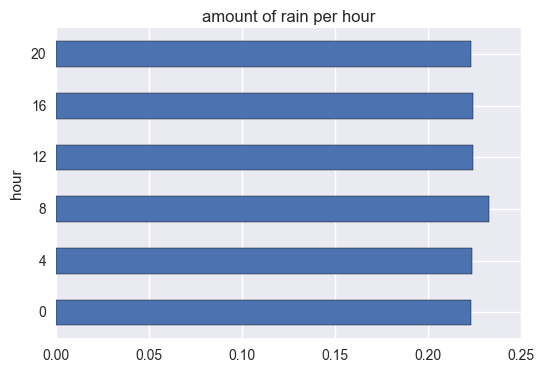

In [34]:
summaryHourOfData['rain'].plot(kind='barh')
plt.title('amount of rain per hour')

In [35]:
ridershipByDay = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
ridershipByDay

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

In [36]:
ridershipByDay_dayName = ridershipByDay.rename_axis({0:"Mon", 1:"Tue", 2:"Wed", 3:"Thr", 4:"Fri", 5:"Sat", 6:"Sun"})
ridershipByDay_dayName

day_week
Mon    1825.264907
Tue    2164.836433
Wed    2297.097957
Thr    2317.072379
Fri    2277.372294
Sat    1383.901479
Sun    1066.436106
Name: ENTRIESn_hourly, dtype: float64

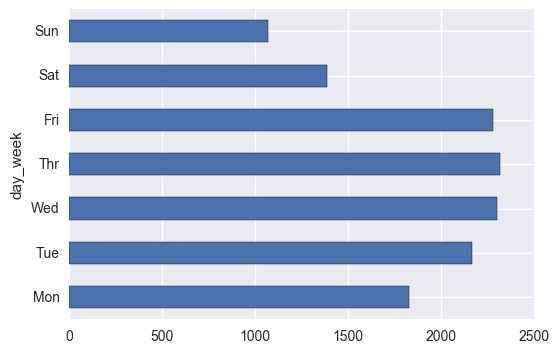

In [37]:
ridershipByDay_dayName.plot(kind='barh')

### Using groupby() to Calculate Hourly Entries and Exits
In the quiz where you calculated hourly entries and exits, you did so for a single set of cumulative entries. However, in the original data, there was a separate set of numbers for each station.

Thus, to correctly calculate the hourly entries and exits, it was necessary to group by station and day, then calculate the hourly entries and exits within each day.

Write a function to do that. You should use the apply() function to call the function you wrote previously. You should also make sure you restrict your grouped data to just the entries and exits columns, since your function may cause an error if it is called on non-numerical data types.

If you would like to learn more about using groupby() in Pandas, this page contains more details.

Note: You will not be able to reproduce the ENTRIESn_hourly and EXITSn_hourly columns in the full dataset using this method. When creating the dataset, we did extra processing to remove erroneous values.
START QUIZ


In [38]:
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Use the `get_hourly_entries_and_exits()` function you wrote
    in a previous quiz, DataFrame Vectorized Operations, and the `.apply()`
    function, to help solve this problem.
    '''
    def getSeriesDiff(series):
        return series - series.shift()
    return entries_and_exits.groupby(['UNIT'])['ENTRIESn','EXITSn'].apply(getSeriesDiff)
    

In [39]:
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [40]:
ridership_df.groupby(['UNIT']).mean()

,ENTRIESn,EXITSn
UNIT,,
R051,3144403,1088198
R079,8936702,13755641


In [41]:
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [42]:
hourlyData = ridership_df.groupby(['UNIT'])['ENTRIESn', 'EXITSn'].diff()
hourlyData

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [43]:
hourlyData['UNIT'] = ridership_df['UNIT']
hourlyData

,ENTRIESn,EXITSn,UNIT
0,NaN,NaN,R051
1,NaN,NaN,R079
2,23.0,8.0,R051
3,14.0,8.0,R079
4,18.0,18.0,R051
5,29.0,205.0,R079
6,71.0,54.0,R051
7,132.0,593.0,R079
8,170.0,44.0,R051


In [44]:
hourlyData.groupby('UNIT').mean()

,ENTRIESn,EXITSn
UNIT,,
R051,70.500000,31.000000
R079,58.333333,268.666667


### Preserving groupby as index

In [45]:
ridership_df.groupby(['UNIT']).first()

,ENTRIESn,EXITSn,TIMEn
UNIT,,,
R051,3144312,1088151,00:00:00
R079,8936644,13755385,02:00:00


In [46]:
ridership_df.groupby(['UNIT'], as_index=False).first()

,UNIT,ENTRIESn,EXITSn,TIMEn
0,R051,3144312,1088151,00:00:00
1,R079,8936644,13755385,02:00:00


## Plotting with DataFrame
- Histograms of subway ridership on both days with rain and days without rain
- A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
  - If you choose this option, you may wish to use the as_index=False argument to groupby(). There is example code in the following quiz.
- A scatterplot with subway ridership on one axis and precipitation or temperature on the other

In [47]:
import pandas as pd

subway_df = pd.read_csv('nyc_subway_weather.csv')

In [49]:
subway_df.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [52]:
# making a scatter plot of subway stations with latitude and longitude 
# as the x and y axes and ridership as the bubble size
data_by_location = subway_df.groupby(['latitude','longitude'], as_index=False).mean()
data_by_location.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,...,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,...,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [54]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

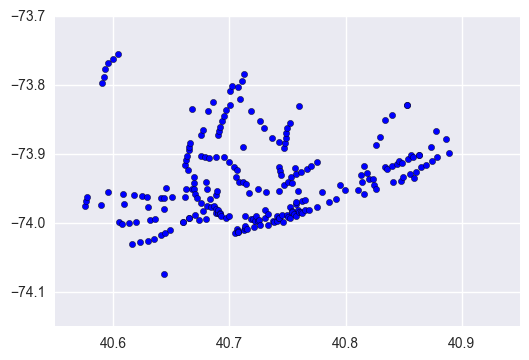

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.scatter(data_by_location['latitude'], data_by_location['longitude'])

Okay, what about bubble sizes? 

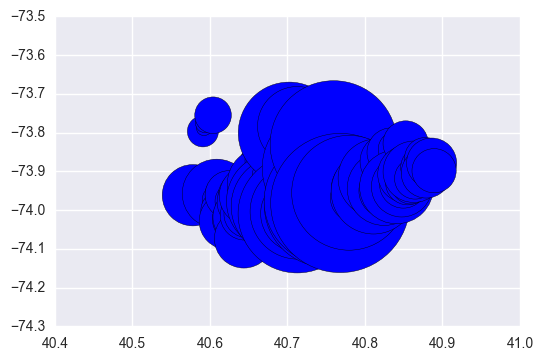

In [57]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], 
            s=data_by_location['ENTRIESn_hourly'])   # s for argument to sizes

Sizes are represented, but with bad visualization. Can I need to normalize (or standardize) these sizes?

In [61]:
scaled_entries = (data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std())
print data_by_location['ENTRIESn_hourly'].head()
print scaled_entries.head()

0     403.896175
1     526.697297
2    1950.295699
3     485.382353
4     500.725610
Name: ENTRIESn_hourly, dtype: float64
0    0.243095
1    0.317006
2    1.173833
3    0.292139
4    0.301374
Name: ENTRIESn_hourly, dtype: float64


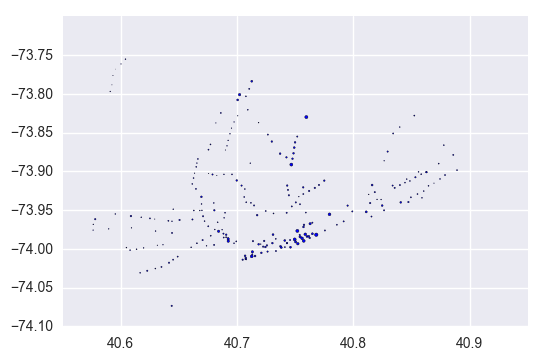

In [62]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], 
            s=scaled_entries)   # s for argument to sizes

A bit smaller? 

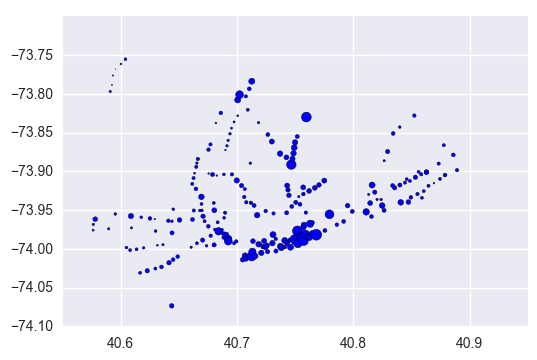

In [65]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], 
            s=scaled_entries*10)   # s for argument to sizes

## 3D data
Now that you've worked with one-dimensional and two-dimensional data, you might be wondering how to work with three or more dimensions.

### 3D data in NumPy
NumPy arrays can have arbitrarily many dimensions. Just like you can create a 1D array from a list, and a 2D array from a list of lists, you can create a 3D array from a list of lists of lists, and so on. For example, the following code would create a 3D array:
```
a = np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])
```

### 3D data in Pandas
Pandas has a data structure called a Panel, which is similar to a DataFrame or a Series, but for 3D data. If you would like, you can learn more about Panels [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel).